# <center> MATH&ML-5. Математический анализ в контексте задачи оптимизации. Часть II

### Юнит 1. Введение. Функции нескольких переменных

In [417]:
#Импорты

import sympy
from sympy import Eq, solveset, Symbol, symbols, Interval, S, log, sin, cos, exp, diff, solve, N
# Аккуратный вывод формул
from sympy import init_printing

from sympy.calculus.util import function_range, continuous_domain

In [418]:
# Задание 1.3

x = symbols('x')
expr = x**2 - 5*x + 4
solveset(Eq(expr.diff(x), 0), x)

In [419]:
# Задание 1.4

x = symbols('x')
expr = x**3 - 6*x**2 + 2
solveset(Eq(expr.diff(x), 0), x)

In [420]:
expr.diff(x)

In [421]:
print(round(1/(1 + exp(-2*2)), 2))
print(round(1/(1 + exp(-2*1)), 2))

0.98
0.88


### Юнит 3. Безусловные экстремумы. Функции нескольких переменных

In [422]:
x, y = symbols('x y')
expr_main = x**3 + 3*x*y**2 - 15*x - 12*y - 1
expr1 = Eq(expr_main.diff(x), 0)
expr2 = Eq(expr_main.diff(y), 0)
solv = solve([expr1, expr2])
solv

In [423]:
#Задание 3.4
x, y = symbols('x y')
expr = 4*x**2 - 6*x*y - 34*x + 5*y**2 + 42*y + 7
solv = solve([expr.diff(x), expr.diff(y)])
solv

In [424]:
#Задание 3.5
x, y = symbols('x y')
expr_main = x**3 - 2*x*y - y**6
expr1 = Eq(expr_main.diff(x), 0)
expr2 = Eq(expr_main.diff(y), 0)

display(expr1, expr2)

In [425]:
#Задание 3.9
x, y = symbols('x y')
expr_main = x**3 + y**3 - 3*x*y
expr1 = Eq(expr_main.diff(x), 0)
expr2 = Eq(expr_main.diff(y), 0)

display(solve([expr1, expr2]))

### Юнит 4. Введение в оптимизацию

In [426]:
import numpy as np

#Функция Розенброка (банана, долины)
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r

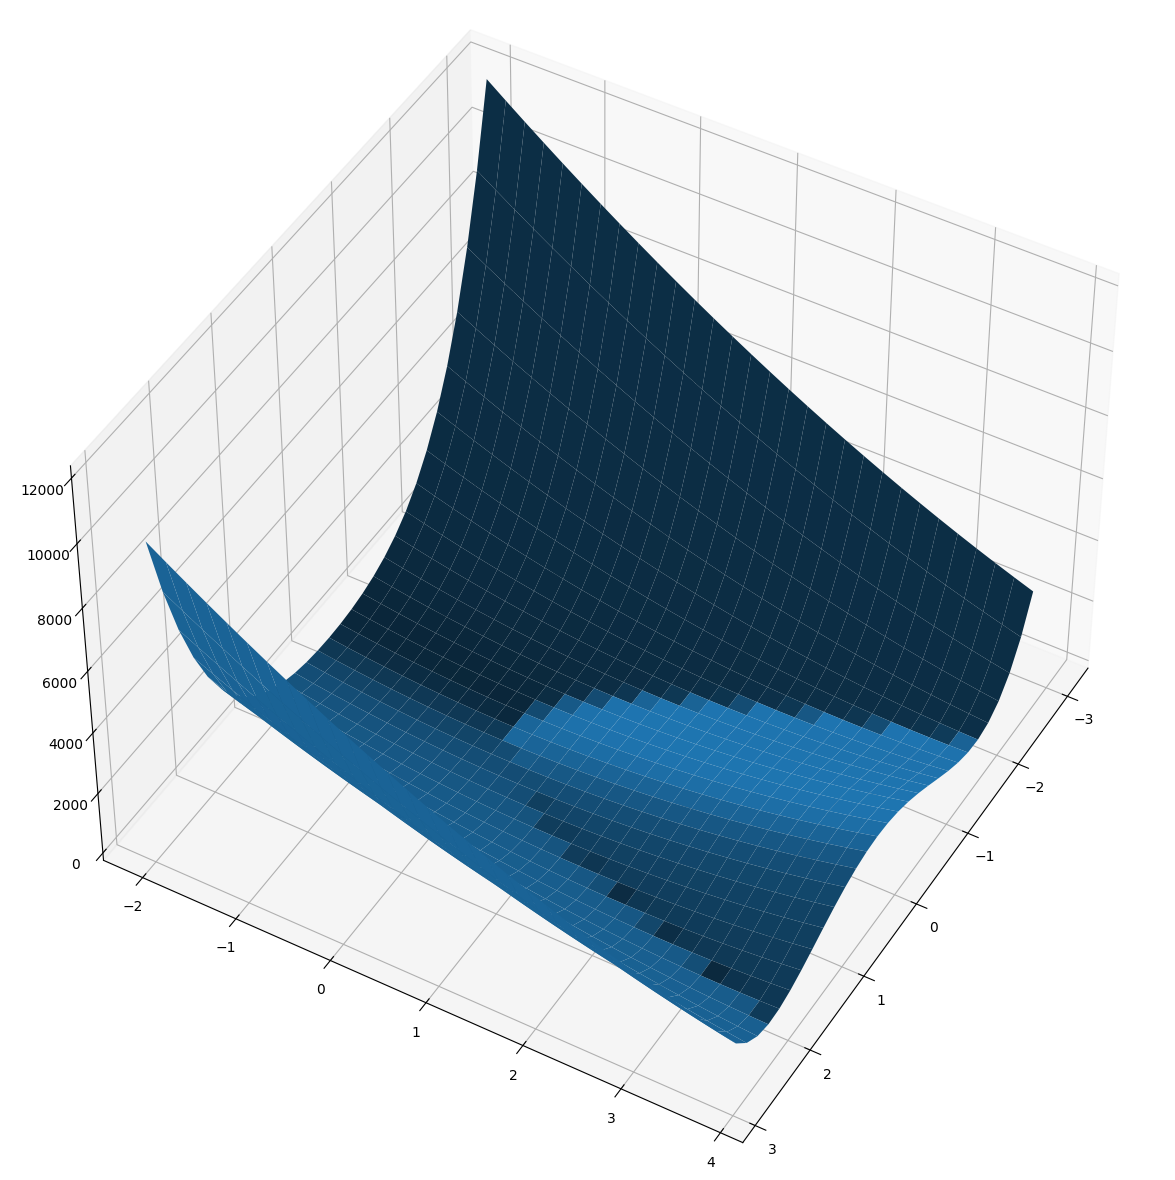

In [427]:
import matplotlib.pyplot as plt
graph = plt.figure(figsize=[25, 15])
ax = graph.add_subplot(projection='3d')
ax.view_init(45, 30)
x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-2, 4, 0.2)
x1, x2 = np.meshgrid(x1, x2)
y = func_rosen(np.array([x1,x2]))
surf = ax.plot_surface(x1, x2, y)
plt.show()

In [428]:
from scipy import optimize
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='powell')
print(result_point.x)

x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='nelder-mead')
print(result_point.x)

#Задание 4.5
from scipy.optimize import least_squares
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = least_squares(func_rosen, x1)
print(np.round(result_point.x, 3))

[1. 1. 1. 1. 1.]
[1.02760651 1.05589639 1.11509457 1.2440091  1.54862169]
[0.939 0.882 0.776 0.603 0.361]


In [429]:
from sympy import *
a,b,w=symbols(' a b w' )
g = 3*a**2 + a + 4*b + 5*b**2
print('Целевая функция для аргументов a и b :\n f = ', g)
q = a + b - 200
print('Функция ограничений: ', q,'= 0')
f = 3*a**2 + a + 4*b + 5*b**2 + w*(a + b - 200)
print('Функция Лагранжа :\n ',f)
fa = f.diff(a)
print('df/da =',fa,'= 0')
fb = f.diff(b)
print('df/db =',fb,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fa,fb,fw],a,b,w)
print('Стационарная точка M(x,y):\n',float(sols[a]),',',float(sols[b]))

Целевая функция для аргументов a и b :
 f =  3*a**2 + a + 5*b**2 + 4*b
Функция ограничений:  a + b - 200 = 0
Функция Лагранжа :
  3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 200)
df/da = 6*a + w + 1 = 0
df/db = 10*b + w + 4 = 0
df/dw = a + b - 200 = 0
Стационарная точка M(x,y):
 125.1875 , 74.8125


In [430]:
#Задание 5.3
x, y, w = symbols('x y w')
expr = ((x-2)**2+(y-1)**2)**0.5 + w*(x + y - 1)
solvs = solve([expr.diff(x), expr.diff(y), expr.diff(w)], x, y, w)
# N - аналог np.round() и round()
display([N(solv, 3) for solv in solvs[0]])

In [431]:
#Задание 5.4
x, y, z, w = symbols('x y z w')
expr = 2*(x*y + y*z + z*x) + w*(x*y*z - 1)
solvs = solve([expr.diff(x), expr.diff(y), expr.diff(z), expr.diff(w)], x, y, z, w)
display([N(solv, 3) for solv in solvs[0]])

In [432]:
# Подключаем аккуратный вывод формул
init_printing()

# Создаём переменные
x1, x2, x1_tilde, lambda1, lambda2 = symbols(
    "x_1 x_2 xtilde_2 \lambda_1 \lambda_2", real=True
)

# Пишем систему уравнений для переменных
dLdx1 = -x2 + lambda1 - lambda2
dLdx2 = -x1 + lambda1
dLdx1_tilde = 2 * lambda2 * x1_tilde
dLdlambda1 = x1 + x2 - 10
dLdlambda2 = -x1 + 6 + x1_tilde**2

# Решаем систему уравнений с помощью функции solve
solution = solve(
    [dLdx1, dLdx2, dLdx1_tilde, dLdlambda1, dLdlambda2],
    x1,
    x2,
    x1_tilde,
    lambda1,
    lambda2,
)

print(solution)

[(6, 4, 0, 6, 2)]


<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
C:\Users\telis\AppData\Local\Temp\ipykernel_31636\1217300328.py:6: SyntaxWarning: invalid escape sequence '\l'
  "x_1 x_2 xtilde_2 \lambda_1 \lambda_2", real=True


### Юнит 6. Градиент и антиградиент

In [433]:
f = np.array([3, 7, 14, 23, 36, 47], dtype=float)

np.gradient(f)

array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

In [434]:
# Задание 6.5
a, b = symbols('a b')
func = (5 - a - 2*b)**2
display(func.diff(a))
display(func.diff(b))
display(solve([func.diff(a), func.diff(b)]))

In [435]:
# Задание 6.6
w0, w1 = symbols('w0 w1')
func = (2.1 - w0 - w1)**2 + (2.9 - w0 - 3*w1)**2 + (4.1 - w0 - 5*w1)**2
display(func.diff(w0))
display(func.diff(w1))
display(solve([func.diff(w0), func.diff(w1)]))

In [436]:
#Задание 6.7
f = np.array([8, 2, 8, 3, 5, 6, 5, 15])
np.gradient(f, 7)

array([-0.85714286,  0.        ,  0.07142857, -0.21428571,  0.21428571,
        0.        ,  0.64285714,  1.42857143])

### Юнит 7. Градиент и градиентый спуск

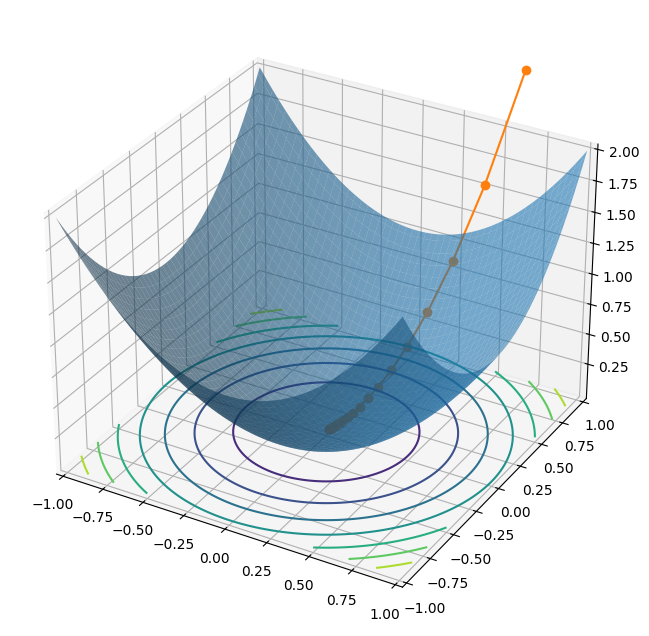

In [437]:
# Функция для выпуклой функции)
def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

# Функция вычисления
def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

# Функция простейшего градиентного спуска
def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

# Функция для постройки графика градиента
def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10,8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())
    

# Проверка
trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)

In [438]:
#Задание 7.7
x, y, z = symbols('x y z')
func = 2*x**2 - 4*x*z + 4*y**2 - 8*y*z + 9*z**2 + 4*x + 8*y - 20*z
display(func.diff(x))
display(func.diff(y))
display(func.diff(z))
display(solve([func.diff(x), func.diff(y), func.diff(z)]))

### Юнит 8. Практика: градиентный спуск

In [439]:
#Задание 8.1
x, y = symbols('x y')
expr_main = 2*x**2 - 4*x*y + y**4 + 2
expr1 = Eq(expr_main.diff(x), 0)
expr2 = Eq(expr_main.diff(y), 0)
display(expr_main.diff(x), expr_main.diff(y))
solv = solve([expr1, expr2])
display(solv)

def f(x, y):
    return 2*x**2 - 4*x*y + y**4 + 2
def grad(x, y):
    dx = 4*x - 4*y
    dy = -4*x + 4*y**3
    return (dx, dy)

x0 = (-5, -5)
gamma = 0.01
x_cur = x0

vals = []
coords = []
i = 0
while True:
    x_new = (x_cur[0] - gamma * grad(*x_cur)[0],
            x_cur[1] - gamma * grad(*x_cur)[1])
    if i > 5000:
        break
    x_cur = x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i += 1
    print(f"iter={i}; x=({x_cur[0]:.4f}, {x_cur[1]:.4f});"
          f" f(x)={f(*x_cur):.4f}; grad f(x)=({grad(*x_cur)[0]:.4f}, {grad(*x_cur)[1]:.4f})")

iter=1; x=(-5.0000, -0.2000); f(x)=48.0016; grad f(x)=(-19.2000, 19.9680)
iter=2; x=(-4.8080, -0.3997); f(x)=40.5726; grad f(x)=(-17.6333, 18.9766)
iter=3; x=(-4.6317, -0.5894); f(x)=34.1049; grad f(x)=(-16.1689, 17.7075)
iter=4; x=(-4.4700, -0.7665); f(x)=28.6013; grad f(x)=(-14.8138, 16.0784)
iter=5; x=(-4.3218, -0.9273); f(x)=24.0654; grad f(x)=(-13.5781, 14.0978)
iter=6; x=(-4.1861, -1.0683); f(x)=20.4610; grad f(x)=(-12.4711, 11.8676)
iter=7; x=(-4.0613, -1.1870); f(x)=17.6914; grad f(x)=(-11.4976, 9.5563)
iter=8; x=(-3.9464, -1.2825); f(x)=15.6080; grad f(x)=(-10.6554, 7.3472)
iter=9; x=(-3.8398, -1.3560); f(x)=14.0422; grad f(x)=(-9.9353, 5.3861)
iter=10; x=(-3.7405, -1.4099); f(x)=12.8390; grad f(x)=(-9.3224, 3.7524)
iter=11; x=(-3.6472, -1.4474); f(x)=11.8776; grad f(x)=(-8.7994, 2.4605)
iter=12; x=(-3.5592, -1.4720); f(x)=11.0746; grad f(x)=(-8.3490, 1.4794)
iter=13; x=(-3.4758, -1.4868); f(x)=10.3774; grad f(x)=(-7.9559, 0.7569)
iter=14; x=(-3.3962, -1.4943); f(x)=9.7545; gr

In [440]:
#Проверка
optimize.minimize(lambda x: f(*x), x0=(2, 2)) 

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.000000000000048
        x: [ 1.000e+00  1.000e+00]
      nit: 7
      jac: [ 6.557e-07 -6.258e-07]
 hess_inv: [[ 3.808e-01  1.251e-01]
            [ 1.251e-01  1.251e-01]]
     nfev: 27
     njev: 9

In [448]:
#Здаание 8.2
x, y, z = symbols('x y z')
expr_main = x**3 - 2*x**2 + y**2 + z**2 - 2*x*y + x*z - y*z + 3*z
expr1 = Eq(expr_main.diff(x), 0)
expr2 = Eq(expr_main.diff(y), 0)
expr3 = Eq(expr_main.diff(z), 0)
display(expr_main.diff(x), expr_main.diff(y), expr_main.diff(z))
solv = solve([expr1, expr2, expr3])
display(solv)

def f(x, y, z):
    return x**3 - 2*x**2 + y**2 + z**2 - 2*x*y + x*z - y*z + 3*z
def grad(x, y, z):
    dx = 3*x**2 - 4*x - 2*y + z
    dy = -2*x + 2*y - z
    dz = x - y + 2*z + 3
    return (dx, dy, dz)

x0 = (3, 3, 3)
gamma = 0.01
x_cur = x0

vals = []
coords = []
i = 0
while True:
    x_new = (x_cur[0] - gamma * grad(*x_cur)[0],
            x_cur[1] - gamma * grad(*x_cur)[1],
            x_cur[2] - gamma * grad(*x_cur)[2])
    if i > 5000:
        break
    x_cur = x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i += 1
    print(f"iter={i}; x=({x_cur[0]:.4f}, {x_cur[1]:.4f}, {x_cur[2]:.4f}); \n"
          f" f(x)={f(*x_cur):.4f}; grad f(x)=({grad(*x_cur)[0]:.4f}, {grad(*x_cur)[1]:.4f}, {grad(*x_cur)[2]:.4f})")
    print('-'*10)

iter=1; x=(2.8800, 3.0300, 2.9100); 
 f(x)=15.7888; grad f(x)=(10.2132, -2.6100, 8.6700)
----------
iter=2; x=(2.7779, 3.0561, 2.8233); 
 f(x)=14.0187; grad f(x)=(8.7493, -2.2668, 8.3684)
----------
iter=3; x=(2.6904, 3.0788, 2.7396); 
 f(x)=12.5700; grad f(x)=(7.5349, -1.9628, 8.0908)
----------
iter=4; x=(2.6150, 3.0984, 2.6587); 
 f(x)=11.3608; grad f(x)=(6.5169, -1.6920, 7.8340)
----------
iter=5; x=(2.5499, 3.1153, 2.5804); 
 f(x)=10.3333; grad f(x)=(5.6556, -1.4494, 7.5953)
----------
iter=6; x=(2.4933, 3.1298, 2.5044); 
 f(x)=9.4465; grad f(x)=(4.9212, -1.2314, 7.3723)
----------
iter=7; x=(2.4441, 3.1421, 2.4307); 
 f(x)=8.6701; grad f(x)=(4.2908, -1.0346, 7.1633)
----------
iter=8; x=(2.4012, 3.1525, 2.3591); 
 f(x)=7.9818; grad f(x)=(3.7464, -0.8565, 6.9668)
----------
iter=9; x=(2.3637, 3.1610, 2.2894); 
 f(x)=7.3648; grad f(x)=(3.2739, -0.6948, 6.7815)
----------
iter=10; x=(2.3310, 3.1680, 2.2216); 
 f(x)=6.8061; grad f(x)=(2.8621, -0.5476, 6.6061)
----------
iter=11; x=(2

In [449]:
#Проверка
optimize.minimize(lambda x: f(*x), x0=(3, 3, 3)) 

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -6.999999999998781
        x: [ 2.000e+00  1.000e+00 -2.000e+00]
      nit: 8
      jac: [ 2.146e-06  1.192e-06  5.960e-08]
 hess_inv: [[ 1.620e-01  1.553e-01 -3.587e-03]
            [ 1.553e-01  8.056e-01  3.245e-01]
            [-3.587e-03  3.245e-01  6.650e-01]]
     nfev: 36
     njev: 9

Задание 8.3 Выполняется в практике часть 2